### Importing Data

In [82]:
# Import data
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [83]:
# Get row and column count
train.shape

(103904, 25)

In [84]:
# Get a snapshot of data
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [85]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [86]:
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [87]:
# Repeating the same steps for test data set as well
test.shape

(25976, 25)

In [88]:
test.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [89]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [91]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

In [92]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [93]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

### Checking for Imbalance

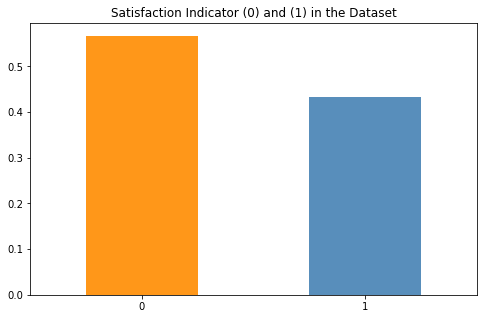

In [94]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

#### The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

### Handling of Missing Data

In [95]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
satisfaction,0,0.000000
Food_and_drink,0,0.000000
Customer_Type,0,0.000000
Age,0,0.000000


In [96]:
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [97]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [98]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [99]:
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [100]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### Exploratory Data Analysis

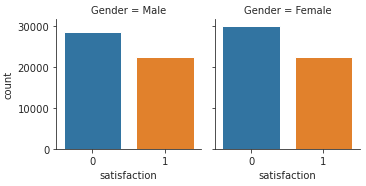

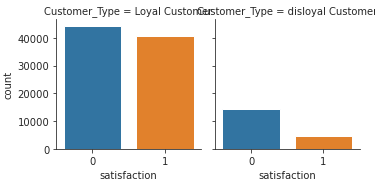

In [101]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

####  Gender: It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

#### Customer Type: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51.

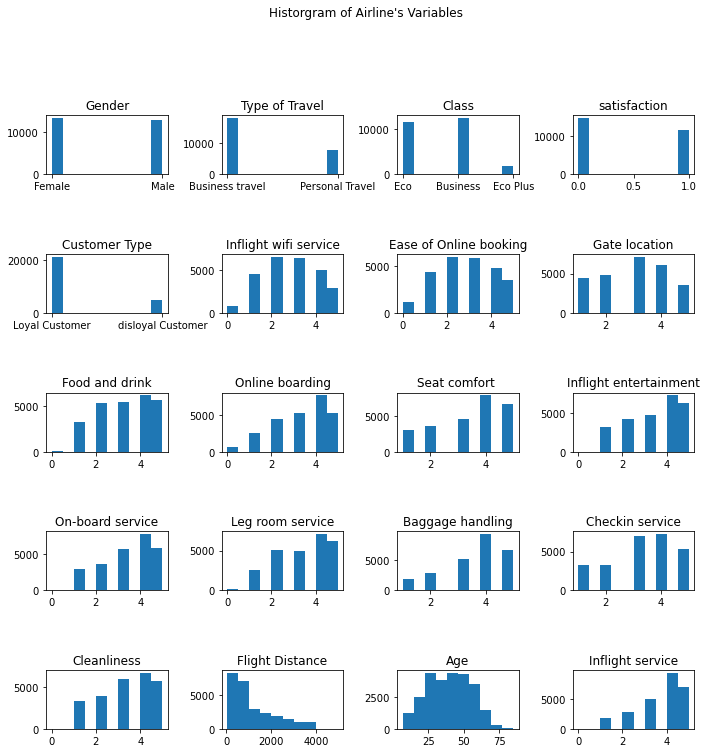

In [102]:
fig, axes = plt.subplots(nrows=5, ncols=4)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)

axes[0,0].hist(test['Gender'])
axes[0,0].set_title('Gender')

axes[0,2].hist(test['Class'])
axes[0,2].set_title('Class')

axes[0,3].hist(test['satisfaction'])
axes[0,3].set_title('satisfaction')

axes[0,1].hist(test['Type_of_Travel'])
axes[0,1].set_title('Type of Travel')

axes[1,0].hist(test['Customer_Type'])
axes[1,0].set_title('Customer Type')

axes[1,1].hist(test['Inflight_wifi_service'])
axes[1,1].set_title('Inflight wifi service')

axes[1,2].hist(test['Ease_of_Online_booking'])
axes[1,2].set_title('Ease of Online booking')

axes[1,3].hist(test['Gate_location'])
axes[1,3].set_title('Gate location')

axes[2,0].hist(test['Food_and_drink'])
axes[2,0].set_title('Food and drink')

axes[2,1].hist(test['Online_boarding'])
axes[2,1].set_title('Online boarding')

axes[2,2].hist(test['Seat_comfort'])
axes[2,2].set_title('Seat comfort ')

axes[2,3].hist(test['Inflight_entertainment'])
axes[2,3].set_title('Inflight entertainment')

axes[3,0].hist(test['On-board_service'])
axes[3,0].set_title('On-board service')

axes[3,1].hist(test['Leg_room_service'])
axes[3,1].set_title('Leg room service')

axes[3,2].hist(test['Baggage_handling'])
axes[3,2].set_title('Baggage handling')

axes[3,3].hist(test['Checkin_service'])
axes[3,3].set_title('Checkin service')
                    
axes[4,0].hist(test['Cleanliness'])
axes[4,0].set_title('Cleanliness')

axes[4,1].hist(test['Flight_Distance'])
axes[4,1].set_title('Flight Distance')

axes[4,2].hist(test['Age'])
axes[4,2].set_title('Age')

axes[4,3].hist(test['Inflight_service'])
axes[4,3].set_title('Inflight service')
    
plt.suptitle("Historgram of Airline's Variables", y=1.1)
plt.show()


#Count = yaxis

In [103]:
#check data type on test dataset

train.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

In [104]:
test.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

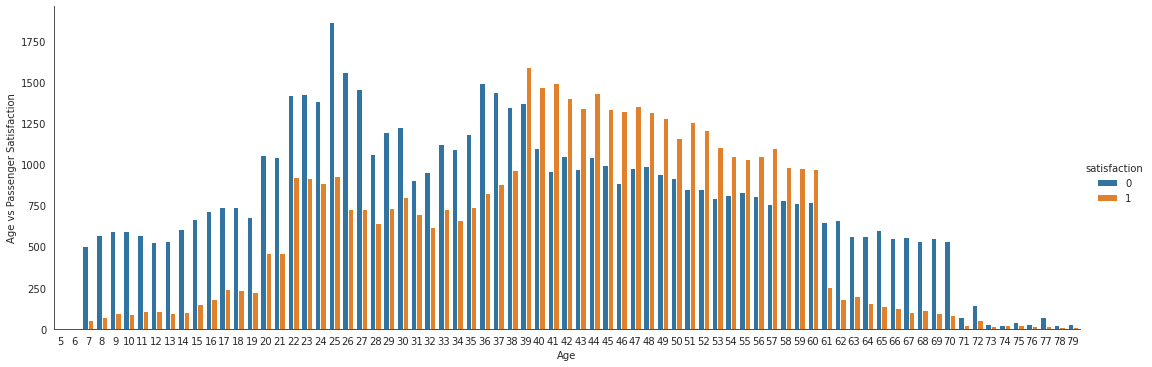

In [105]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

#### Age: From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

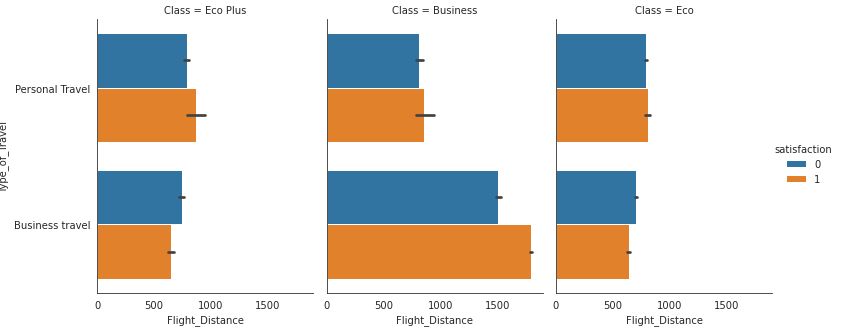

In [106]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

#### Type of Travel, Class, Flight Distance: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

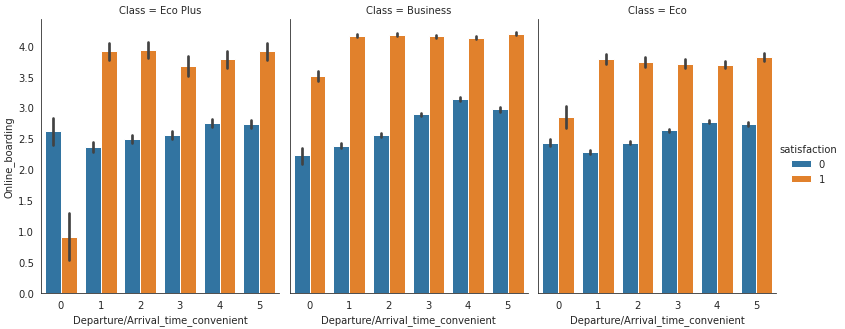

In [107]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

#### Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

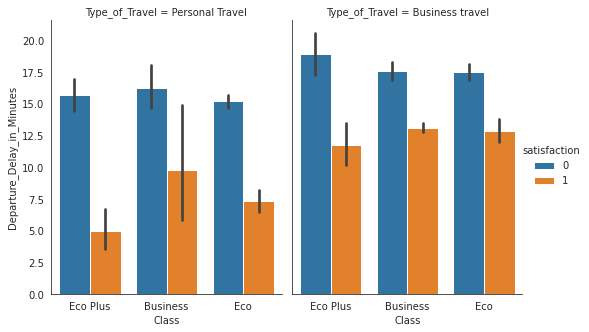

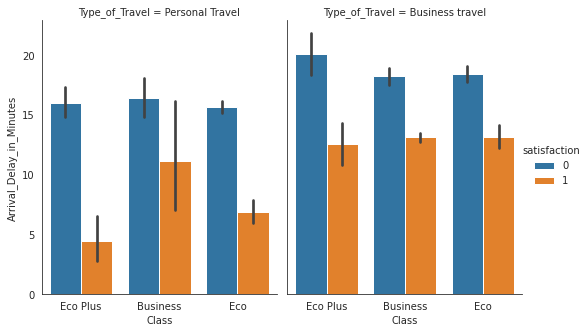

In [108]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

#### Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

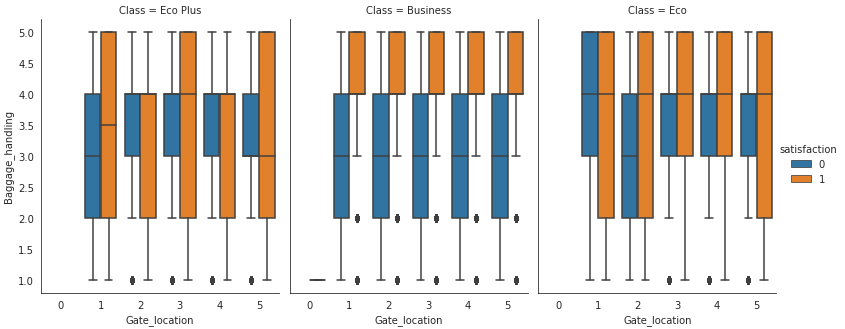

In [109]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

#### Baggage Handling, Gate Location grouped by Class: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

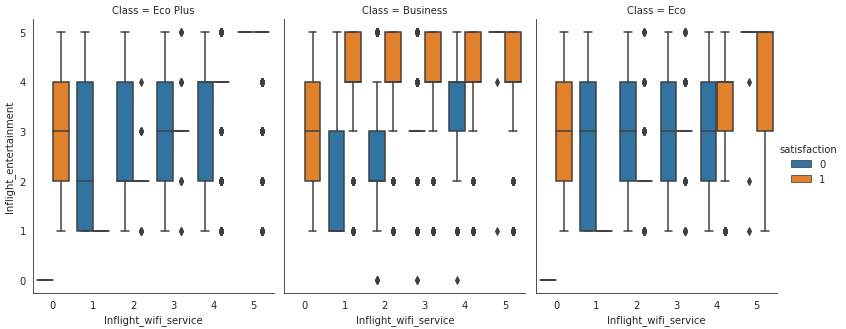

In [110]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

#### Inflight Entertainment, Inflight wi-fi Service grouped by Class: It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

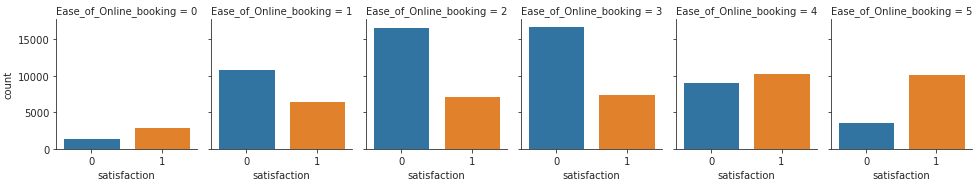

In [111]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

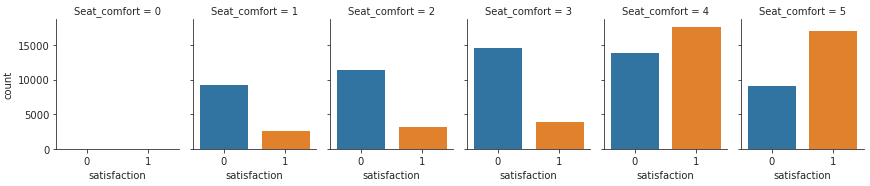

In [112]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

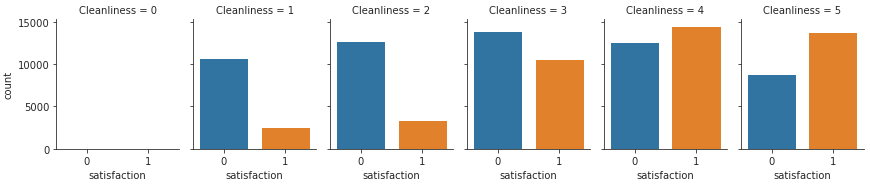

In [113]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

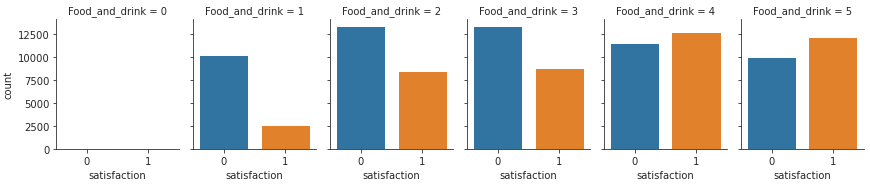

In [114]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

#### Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink: For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

<AxesSubplot:xlabel='Leg_room_service', ylabel='satisfaction'>

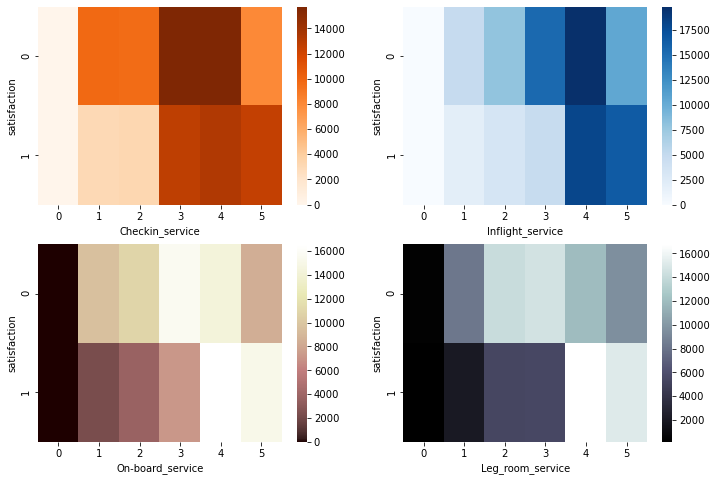

In [115]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

#### Checkin Service, Inflight Service, On-board Service, Leg-room Service: For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.

### Label Encoding of Categorical Variables

In [116]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [117]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Outliers Detection and Removal

In [118]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [119]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Correlation among Features

In [120]:
# getting correlation heatmap
no_categorical_attributes = ['Gender',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

trainnn = train[no_categorical_attributes]

### try a pair wise correlation heatmap for better visual

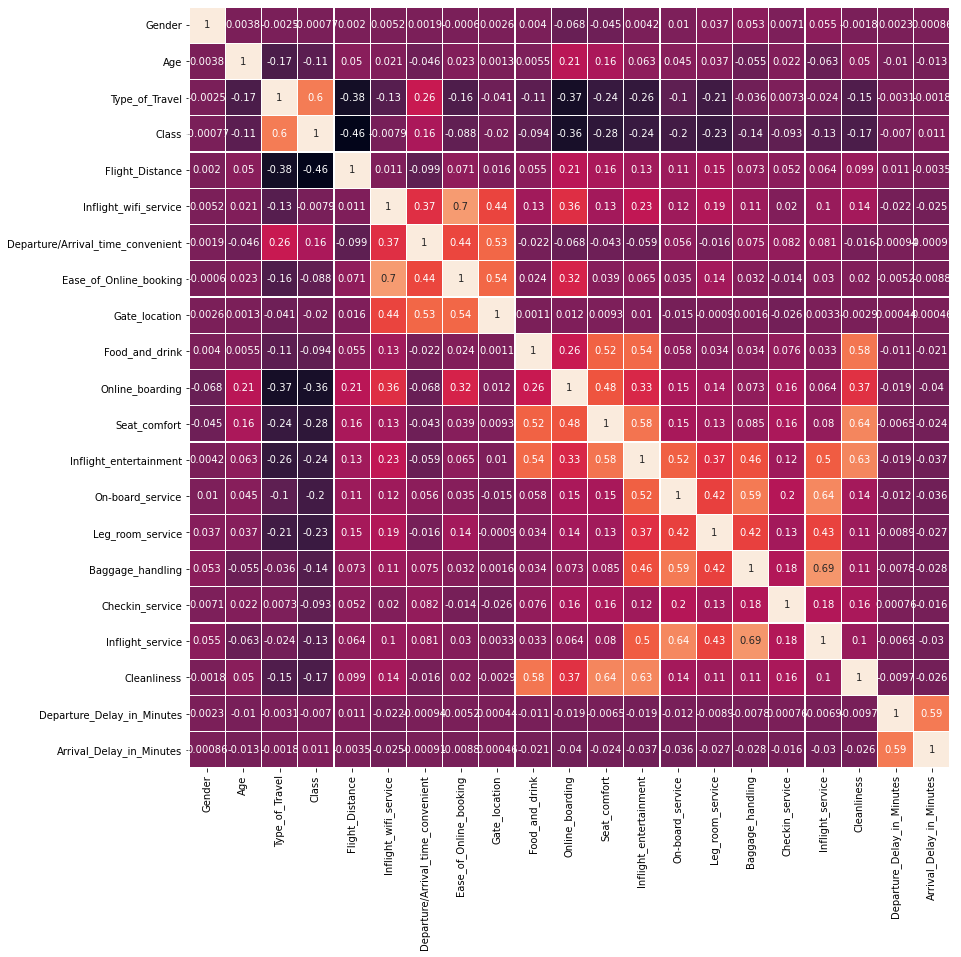

In [121]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(trainnn.corr(), annot=True, square=True, cbar=False, ax=ax, linewidths=0.25);

#### "Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

### Top 10 Feature Selection through Chi-Square

In [122]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [123]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


#### These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.

### Feature Permutation Importance

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
!pip install eli5

In [126]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


#### From all above results, finally we can combine and conclude the list of important features.

#### Really Important Features: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

#### Important Features: Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

### Building Models

In [127]:
features = ['Class','Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [128]:
list(train)

['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

In [129]:
full_features = ['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

target = ['satisfaction']

# Split into test and train
X_train_full = train[full_features]
y_train = train[target].to_numpy()
X_test_full = test[full_features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.fit_transform(X_test_full)

In [140]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

#### Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

Accuracy = 0.8169464120726825
ROC Area under Curve = 0.8235597391220084
Time taken = 0.3078572750091553
              precision    recall  f1-score   support

           0    0.88942   0.76937   0.82505     14573
           1    0.74862   0.87775   0.80806     11403

    accuracy                        0.81695     25976
   macro avg    0.81902   0.82356   0.81655     25976
weighted avg    0.82761   0.81695   0.81759     25976



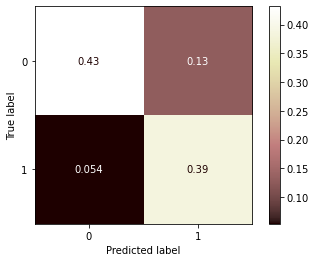

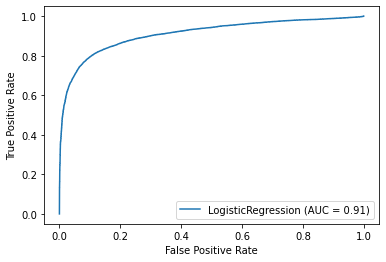

In [141]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### Logistic Regression (No regularization, with full set of 22 features):

In [143]:
logreg = LogisticRegression
logreg, accuracy_lr, roc_auc_lr, tt_lr = run_model(logreg, X_train_full, y_train, X_test_full, y_test)

TypeError: fit() missing 1 required positional argument: 'y'

#### Logistic Regression(No regularization, with 13 features: After feature selection):

In [133]:
# running a basic logistic regression model without penalties
logreg, accuracy_lr, roc_auc_lr, tt_lr = run_model(logreg, X_train, y_train, X_test, y_test)

TypeError: fit() missing 1 required positional argument: 'y'

#### Logistic Regression insights:

In [66]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.307060
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61184
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.5569
Time:                        23:44:15   Log-Likelihood:                -18791.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2852      0.016    -17.291      0.000      -0.318      -0.253
x2            -1.5219      0.

In [137]:
no_in_en = ['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

target = ['satisfaction']

# Split into test and train
X_train_no = train[no_in_en]
y_train = train[target].to_numpy()
X_test_no = test[full_features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_no = scaler.fit_transform(X_train_no)
X_test_no = scaler.fit_transform(X_test_no)

In [139]:
# running a basic logistic regression model without penalties
logreg, accuracy_lr, roc_auc_lr, tt_lr = run_model(logreg, X_train_no, y_train, X_test_no, y_test)

TypeError: fit() missing 1 required positional argument: 'y'

#### We can see, among 13 features, except 6th feature (Inflight_entertainment), rest 12 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value (McFadden's Pseudo R-Squared Value) of 0.55 represents an excellent fit.

### Model-2: Naive Bayes Classifier

#### Naive Bayes Classifier with full set of 22 features

Accuracy = 0.8331151832460733
ROC Area under Curve = 0.8348700722395282
Time taken = 0.045890092849731445
              precision    recall  f1-score   support

           0    0.87431   0.82049   0.84654     14573
           1    0.78732   0.84925   0.81711     11403

    accuracy                        0.83312     25976
   macro avg    0.83081   0.83487   0.83183     25976
weighted avg    0.83612   0.83312   0.83362     25976



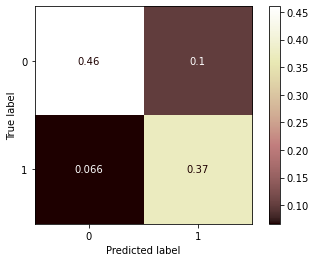

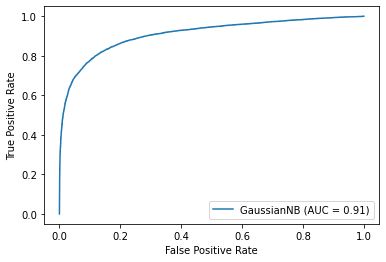

In [118]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train_full, y_train, X_test_full, y_test)

#### Naive Bayes with 13 set of features

Accuracy = 0.8342700954727441
ROC Area under Curve = 0.835079097712106
Time taken = 0.028384923934936523
              precision    recall  f1-score   support

           0    0.86994   0.82845   0.84869     14573
           1    0.79335   0.84171   0.81682     11403

    accuracy                        0.83427     25976
   macro avg    0.83165   0.83508   0.83275     25976
weighted avg    0.83632   0.83427   0.83470     25976



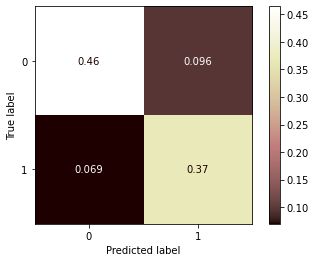

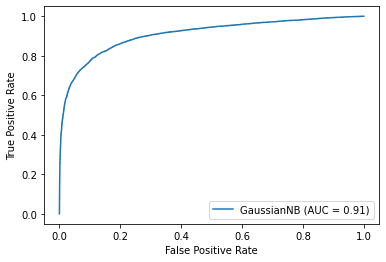

In [138]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

#### Model-3: Decision Tree Classifier

Accuracy = 0.8769633507853403
ROC Area under Curve = 0.882018410862527
Time taken = 0.06352400779724121
              precision    recall  f1-score   support

           0    0.93348   0.84060   0.88460     14573
           1    0.81926   0.92344   0.86824     11403

    accuracy                        0.87696     25976
   macro avg    0.87637   0.88202   0.87642     25976
weighted avg    0.88334   0.87696   0.87742     25976



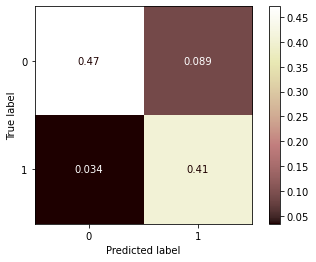

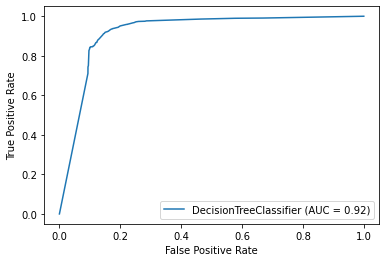

In [146]:
# og:  0.8869
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

#### Since Decision Tree is a white-box (explainable) model, we can deep-dive into its visualization to get more valuable insight below. From tree-visualization, we can extract rules which are contributing towards passenger-satisfaction.

In [91]:
#%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [92]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12
# we have taken only really important features here to accommodate the entire tree picture
graph = graphviz.Source(data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### From above tree visualization, it can be easily spotted that rule "Type_of_Travel <=0.227 and Seat_comfort <= -0.089 and Online_boarding <= 0.045" (all normalized values) contributes towards passenger satisfaction indicator= 1. Like that, many other rules can be extracted easily by going through the nodes.

#### Model-4: Random Forest

Accuracy = 0.8955959347089621
ROC Area under Curve = 0.9017720311208268
Time taken = 8.206439971923828
              precision    recall  f1-score   support

           0    0.95806   0.85116   0.90145     14573
           1    0.83353   0.95238   0.88900     11403

    accuracy                        0.89560     25976
   macro avg    0.89579   0.90177   0.89523     25976
weighted avg    0.90339   0.89560   0.89599     25976



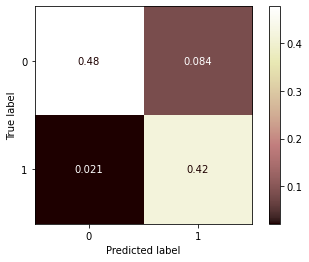

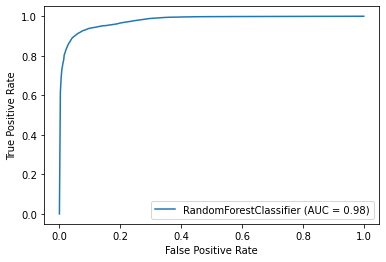

In [337]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': None,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': None}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [329]:
import pandas as pd
feature_imp = pd.Series(model_rf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Type_of_Travel                       0.204204
Inflight_wifi_service                0.120373
Online_boarding                      0.116962
Class                                0.096108
Inflight_entertainment               0.088439
Seat_comfort                         0.052676
Leg_room_service                     0.034793
Flight_Distance                      0.032932
Ease_of_Online_booking               0.031013
Cleanliness                          0.030753
Baggage_handling                     0.025987
Age                                  0.025984
On-board_service                     0.025517
Inflight_service                     0.024460
Checkin_service                      0.023764
Departure/Arrival_time_convenient    0.020359
Gate_location                        0.014309
Food_and_drink                       0.011335
Arrival_Delay_in_Minutes             0.008626
Departure_Delay_in_Minutes           0.007245
Gender                               0.004159
Customer_Type                     

No handles with labels found to put in legend.


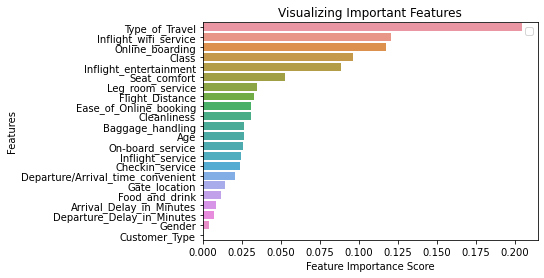

In [330]:
#visualize the result:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [84]:
#remove Customer_Type since it has 0 score
features = ['Gender','Age','Type_of_Travel','Class','Flight_Distance','Inflight_wifi_service',
            'Departure/Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink',
            'Online_boarding', 'Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service',
            'Baggage_handling','Checkin_service','Inflight_service','Cleanliness','Departure_Delay_in_Minutes',
            'Arrival_Delay_in_Minutes']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Accuracy = 0.8970588235294118
ROC Area under Curve = 0.9033810307978498
Time taken = 7.26469874382019
              precision    recall  f1-score   support

           0    0.96045   0.85157   0.90274     14573
           1    0.83432   0.95519   0.89067     11403

    accuracy                        0.89706     25976
   macro avg    0.89738   0.90338   0.89671     25976
weighted avg    0.90508   0.89706   0.89744     25976



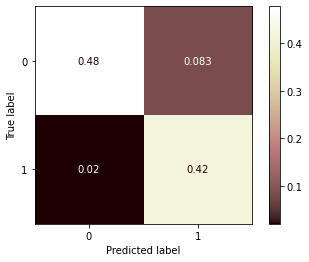

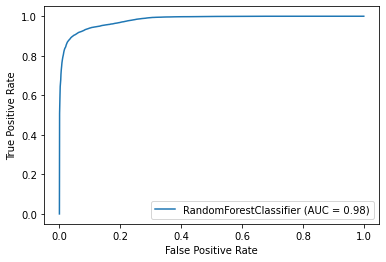

In [85]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': None,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': None}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00412513 0.         0.0258749  0.21982853 0.08990315 0.03140161
 0.12224491 0.01737014 0.03081474 0.01485982 0.01068989 0.11324523
 0.06338185 0.06652081 0.02798984 0.04231821 0.02388634 0.02276466
 0.02411625 0.03309566 0.00702376 0.00854455]


In [87]:
#generating the model on selected features 
features = ['Type_of_Travel','Class','Inflight_wifi_service',
            'Online_boarding', 'Seat_comfort','Inflight_entertainment']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Accuracy = 0.8927856482907299
ROC Area under Curve = 0.8976650010282176
Time taken = 3.3178088665008545
              precision    recall  f1-score   support

           0    0.94618   0.85768   0.89976     14573
           1    0.83754   0.93765   0.88477     11403

    accuracy                        0.89279     25976
   macro avg    0.89186   0.89767   0.89226     25976
weighted avg    0.89849   0.89279   0.89318     25976



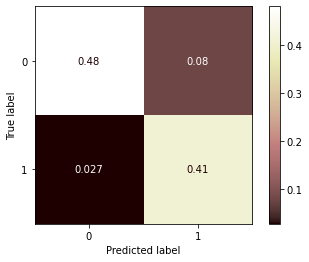

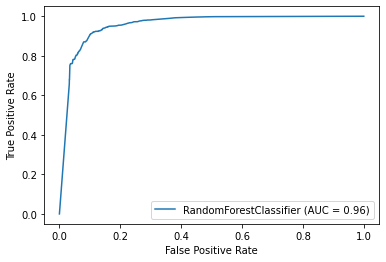

In [88]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': None,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': None}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

#### Well, we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see how many decision trees are minimally required make the Accuarcy consistent (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

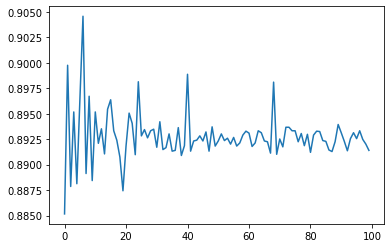

In [89]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

#### From above graph, it is evident that minimum 50 trees are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

#### We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

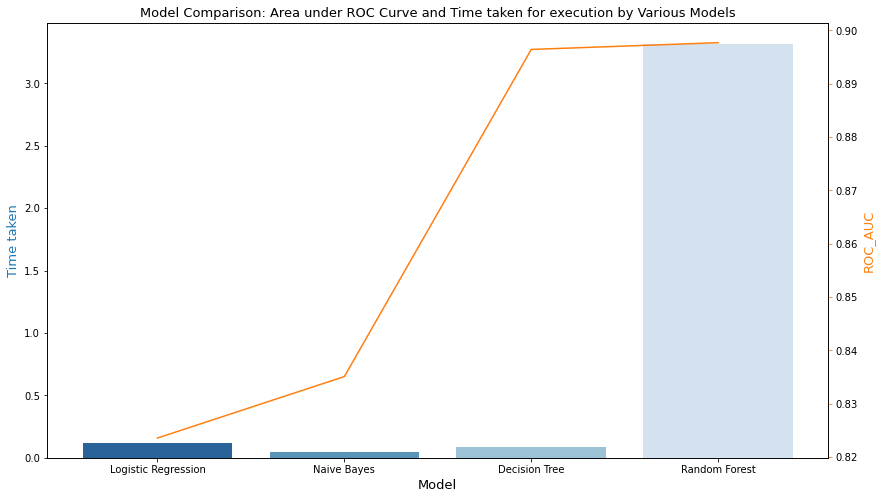

In [90]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_dt, roc_auc_rf]
tt = [tt_lr, tt_nb, tt_dt, tt_rf]

model_data = {'Model': ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [120]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [133]:
random_state=0

classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]

dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}

rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}

knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}

classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [134]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],
                     param_grid=classifier_param[i],
                     cv=StratifiedKFold(n_splits=10),
                     scoring="accuracy",
                     n_jobs=-1,
                     verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 2234 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.9611256378130051
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 29.3min finished


0.9669101918699605
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


0.8856808083041464


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.3s finished


Text(0.5, 1.0, 'Cross Validation Scores')

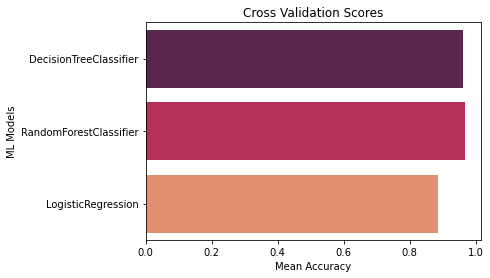

In [140]:
cv_results = pd.DataFrame({"Cross Validation Means":
                           [0.9611256378130051,0.9669101918699605,0.8856808083041464], 
                           "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results,palette="rocket")
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

### Conclusion

#### We observe, Random Forest and AdaBoost have performed equally well on producing high ROC_AUC score (90%). But Random Forest has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model.